In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score

In [6]:
dataset=pd.read_csv("emails.csv")
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
dataset.shape

(5172, 3002)

In [12]:
dataset.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [15]:
dataset.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [29]:
dataset.duplicated().value_counts()

False    5172
Name: count, dtype: int64

In [28]:
dataset.shape

(5172, 3002)

In [30]:
spam_email=dataset[dataset["Prediction"]==1]
spam_email.shape

(1500, 3002)

In [31]:
true_email=dataset[dataset["Prediction"]==0]
true_email.shape

(3672, 3002)

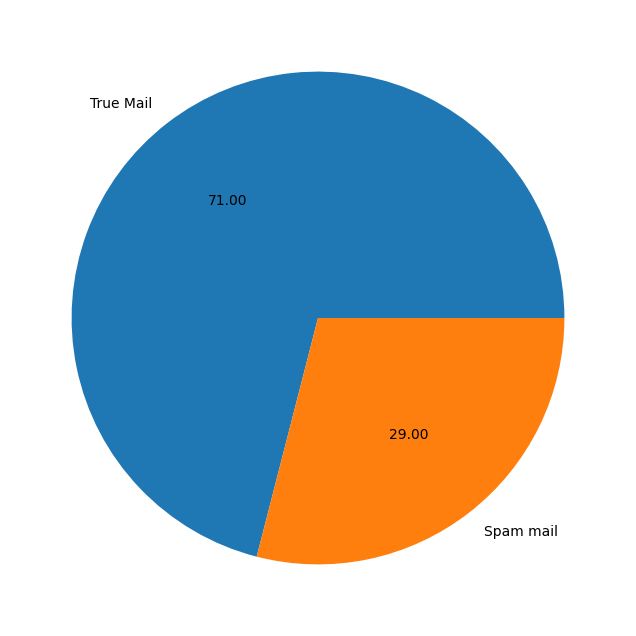

In [35]:
plt.figure(figsize=(10,8))
plt.pie(dataset["Prediction"].value_counts(),labels=['True Mail','Spam mail'],autopct='%0.2f')
plt.show()

In [36]:
dataset.shape

(5172, 3002)

In [38]:
new_dataset=dataset.drop(columns=dataset[["Email No."]])
new_dataset.shape

(5172, 3001)

In [55]:
x=new_dataset.iloc[::-1]
y=new_dataset["Prediction"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 37)

In [52]:
print(x_train.shape,x_test.shape)

(4137, 3001) (1035, 3001)


In [64]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6917874396135266

In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2.8,None]
max_samples=[0.5,0.75,1.0]

In [73]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples
            }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2.8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [75]:
rfc=RandomForestClassifier()

In [76]:
from sklearn.model_selection import GridSearchCV
rfc_grid=GridSearchCV(estimator=rfc,
                      param_grid=param_grid,
                      cv=5,
                      verbose=2,
                      n_jobs=-1)

In [77]:
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [58]:
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6966183574879227

In [59]:
rfc=RandomForestClassifier(max_samples=0.75, random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [61]:
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.706280193236715

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.5971014492753624

In [70]:
svm=SVC()
svm.fit(x_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [71]:
y_pred=dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.5971014492753624

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # only one that supports both l1 and l2
}

logreg = LogisticRegression()
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

If your kernel is 'linear', it's better to use LinearSVC — it’s faster for high-dimensional data (e.g., text classification).

python
Copy
Edit
from sklearn.svm import LinearSVC
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)